# Non-negative matrix factorization (NMF)

## Using scikit-learn NMF

* follows `fit()` / `transform()` pattern.
* must specify number of components e.g. `NMF(n_components=2)`
* works with NumPy arrays and with `csr_matrix`


In [1]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

In [2]:
# toy example
words = ['course', 'datacamp', 'potato', 'the']
vectorizer = TfidfVectorizer()
samples = vectorizer.fit_transform(words)
sparse_mat = csr_matrix(samples)

sparse_mat.toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [3]:
model = NMF(n_components=2, max_iter=400)
model.fit(sparse_mat)

NMF(max_iter=400, n_components=2)

In [4]:
nmf_features = model.transform(samples)

In [5]:
print(model.components_)

[[0.         0.89442719 0.4472136  0.        ]
 [1.         0.         0.         0.        ]]


In [6]:
print(nmf_features)

[[0.         1.        ]
 [0.89442719 0.        ]
 [0.4472136  0.        ]
 [0.         0.        ]]


In [7]:

samples[0, :].toarray()

array([[1., 0., 0., 0.]])

In [8]:
nmf_features[0, :]

array([0., 1.])

## Reconstruction of a sample
* Multiply components by feature values, and add up
* can also be expressed as a product of matrices.
* this is 'matrixFactorization' in NMF

## exploring the LED digits dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
digits = pd.read_csv("../datasets/unsupervised_learning/lcd-digits.csv")
digits.shape

(99, 104)

In [13]:
digit_0 = digits.iloc[0]
bitmap = np.array(digit_0).reshape((13, 8))
bitmap.shape

(13, 8)

In [14]:
bitmap

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

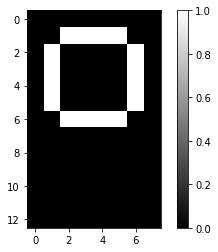

In [15]:
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [16]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

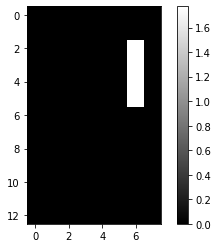

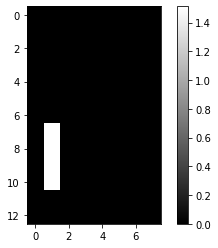

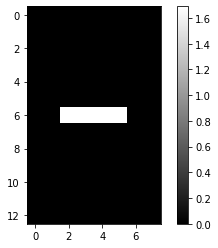

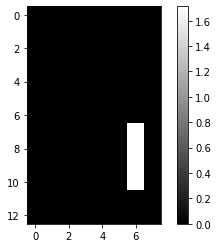

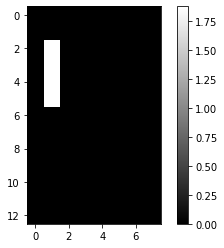

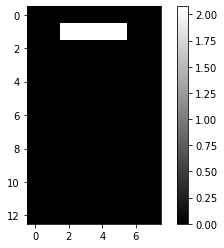

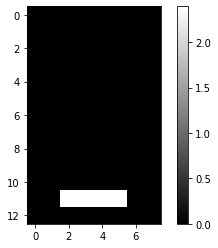

In [19]:
model = NMF(n_components=7)
features = model.fit_transform(digits)

for component in model.components_:
    show_as_image(component)

In [20]:
digit_features = features[0]
digit_features

array([0.56389272, 0.        , 0.59151401, 0.        , 0.53290007,
       0.48133215, 0.        ])